# 데이터 불러오기

In [1]:
import os

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

In [2]:
data_set = tf.keras.utils.get_file(
      fname="imdb.tar.gz", 
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
      extract=True)

84131840/84125825 [==============================] - 5s 0us/step


In [9]:
data_set

'/Users/hbae/.keras/datasets/imdb.tar.gz'

In [14]:
def data(directory):
    print(directory)
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    print(pos_df)
    print(neg_df)
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0

    return pd.concat([pos_df, neg_df])

In [4]:
def directory_data(directory):
    data = {}
    data["review"] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), "r", encoding='utf-8') as file:
            data["review"].append(file.read())
            
    return pd.DataFrame.from_dict(data)

In [15]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

/Users/hbae/.keras/datasets/aclImdb/train
                                                  review
0      For a movie that gets no respect there sure ar...
1      Bizarre horror movie filled with famous faces ...
2      A solid, if unremarkable film. Matthau, as Ein...
3      It's a strange feeling to sit alone in a theat...
4      You probably all already know this by now, but...
...                                                  ...
12495  About a year ago I finally gave up on American...
12496  When I saw the elaborate DVD box for this and ...
12497  Last November, I had a chance to see this film...
12498  Great movie -I loved it. Great editing and use...
12499  Enchanted April is a tone poem, an impressioni...

[12500 rows x 1 columns]
                                                  review
0      Working with one of the best Shakespeare sourc...
1      Well...tremors I, the original started off in ...
2      Ouch! This one was a bit painful to sit throug...
3      I've seen som

In [16]:
train_df.head()

review  sentiment
0  For a movie that gets no respect there sure ar...          1
1  Bizarre horror movie filled with famous faces ...          1
2  A solid, if unremarkable film. Matthau, as Ein...          1
3  It's a strange feeling to sit alone in a theat...          1
4  You probably all already know this by now, but...          1

In [17]:
reviews = list(train_df['review'])

In [21]:
reviews

['For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.',
 'Bizarre horror movie filled with famous faces but stolen by Cristina Raines (later of TV\'s "Flamingo Road") as a pretty but somewhat unstable model with a gummy smile who is slated to pay for her attempted suicides by guarding the Gateway to Hell! The scenes with Raines modeling are very well captured, the mood music is perfect, Deborah Raffin is charming as Cristina\'s pal, but when Raines moves into a creepy Brooklyn Heights brownstone (inhabited by a blind priest on the top floor), things really start cooking. The neighbors, including a fantastically wicked Burgess Meredith and kinky couple Sylvia Miles & Beverly D\'Angelo, are a diabolical lot, and Eli Wallach is great fun as a wily police detec

# 데이터 분석

In [18]:
# 문자열 문장 리스트를 토크나이즈
tokenized_reviews = [r.split() for r in reviews]

In [20]:
tokenized_reviews

[['For',
  'a',
  'movie',
  'that',
  'gets',
  'no',
  'respect',
  'there',
  'sure',
  'are',
  'a',
  'lot',
  'of',
  'memorable',
  'quotes',
  'listed',
  'for',
  'this',
  'gem.',
  'Imagine',
  'a',
  'movie',
  'where',
  'Joe',
  'Piscopo',
  'is',
  'actually',
  'funny!',
  'Maureen',
  'Stapleton',
  'is',
  'a',
  'scene',
  'stealer.',
  'The',
  'Moroni',
  'character',
  'is',
  'an',
  'absolute',
  'scream.',
  'Watch',
  'for',
  'Alan',
  '"The',
  'Skipper"',
  'Hale',
  'jr.',
  'as',
  'a',
  'police',
  'Sgt.'],
 ['Bizarre',
  'horror',
  'movie',
  'filled',
  'with',
  'famous',
  'faces',
  'but',
  'stolen',
  'by',
  'Cristina',
  'Raines',
  '(later',
  'of',
  "TV's",
  '"Flamingo',
  'Road")',
  'as',
  'a',
  'pretty',
  'but',
  'somewhat',
  'unstable',
  'model',
  'with',
  'a',
  'gummy',
  'smile',
  'who',
  'is',
  'slated',
  'to',
  'pay',
  'for',
  'her',
  'attempted',
  'suicides',
  'by',
  'guarding',
  'the',
  'Gateway',
  'to',
  

In [22]:
# 토크나이즈 된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]

In [23]:
review_len_by_token

[52,
 166,
 55,
 442,
 144,
 90,
 112,
 117,
 485,
 55,
 60,
 366,
 81,
 624,
 122,
 44,
 131,
 140,
 182,
 142,
 63,
 127,
 741,
 151,
 170,
 196,
 138,
 434,
 125,
 330,
 485,
 154,
 174,
 178,
 189,
 106,
 179,
 81,
 89,
 255,
 109,
 111,
 427,
 274,
 166,
 142,
 152,
 129,
 68,
 315,
 170,
 250,
 123,
 122,
 241,
 834,
 146,
 449,
 612,
 349,
 117,
 169,
 121,
 149,
 134,
 201,
 81,
 248,
 174,
 469,
 78,
 144,
 79,
 154,
 126,
 323,
 231,
 127,
 135,
 296,
 249,
 311,
 209,
 128,
 296,
 124,
 129,
 342,
 582,
 132,
 140,
 180,
 76,
 265,
 141,
 123,
 155,
 381,
 143,
 110,
 128,
 60,
 244,
 77,
 131,
 354,
 472,
 544,
 226,
 145,
 95,
 139,
 295,
 168,
 373,
 415,
 73,
 55,
 127,
 456,
 191,
 465,
 392,
 131,
 29,
 104,
 176,
 185,
 531,
 277,
 176,
 333,
 122,
 525,
 272,
 232,
 207,
 44,
 60,
 427,
 238,
 527,
 226,
 138,
 114,
 186,
 155,
 427,
 218,
 70,
 594,
 215,
 171,
 146,
 353,
 242,
 363,
 42,
 147,
 47,
 116,
 315,
 78,
 303,
 59,
 489,
 262,
 118,
 78,
 539,
 252,
 17

In [24]:
# 토크나이즈 된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]

In [26]:
review_len_by_eumjeol

[233,
 868,
 264,
 2155,
 640,
 414,
 537,
 533,
 2308,
 221,
 279,
 2074,
 327,
 2882,
 558,
 214,
 556,
 677,
 715,
 591,
 330,
 576,
 3439,
 621,
 961,
 818,
 686,
 2134,
 525,
 1384,
 2392,
 703,
 799,
 832,
 771,
 514,
 775,
 345,
 415,
 1235,
 538,
 483,
 2078,
 1465,
 721,
 710,
 772,
 606,
 268,
 1386,
 729,
 1233,
 556,
 589,
 952,
 3387,
 640,
 2424,
 2909,
 1632,
 533,
 828,
 550,
 665,
 596,
 970,
 396,
 1185,
 836,
 2252,
 379,
 682,
 330,
 694,
 502,
 1484,
 1127,
 595,
 628,
 1325,
 1319,
 1416,
 862,
 594,
 1356,
 544,
 572,
 1594,
 2626,
 560,
 693,
 775,
 385,
 1069,
 643,
 541,
 656,
 2040,
 610,
 587,
 590,
 261,
 1076,
 362,
 619,
 1597,
 2496,
 2458,
 1073,
 691,
 453,
 687,
 1377,
 804,
 1691,
 1887,
 339,
 258,
 571,
 2131,
 911,
 2077,
 1783,
 689,
 127,
 499,
 776,
 806,
 2435,
 1270,
 831,
 1546,
 574,
 2632,
 1365,
 1114,
 1088,
 195,
 286,
 1939,
 1153,
 2584,
 1045,
 629,
 636,
 933,
 582,
 1977,
 1138,
 306,
 2762,
 1037,
 805,
 656,
 1591,
 1284,
 1692,


In [25]:
import matplotlib.pyplot as plt

# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(review_len_by_token, bins=50, alpha=0.5, color= 'r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Review Length Histogram')
# 그래프 x 축 라벨
plt.xlabel('Review Length')
# 그래프 y 축 라벨
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

In [27]:
import numpy as np

print('문장 최대길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간길이: {}'.format(np.median(review_len_by_token)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대길이: 2470
문장 최소길이: 10
문장 평균길이: 233.79
문장 길이 표준편차: 173.73
문장 중간길이: 174.0
제 1 사분위 길이: 127.0
제 3 사분위 길이: 284.0


{'whiskers': [<matplotlib.lines.Line2D at 0x152918a10>,
 'caps': [<matplotlib.lines.Line2D at 0x154ecc650>,
 'boxes': [<matplotlib.lines.Line2D at 0x154ec9650>],
 'medians': [<matplotlib.lines.Line2D at 0x154ed1150>],
 'fliers': [<matplotlib.lines.Line2D at 0x154ed1bd0>],
 'means': [<matplotlib.lines.Line2D at 0x154ed1690>]}

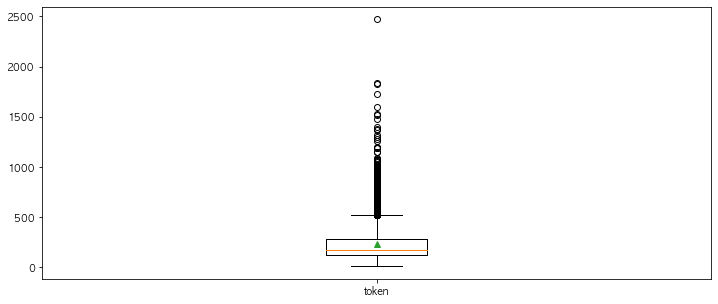

In [28]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([review_len_by_token],
             labels=['token'],
             showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x154f7a290>,
 'caps': [<matplotlib.lines.Line2D at 0x154f7ad10>,
 'boxes': [<matplotlib.lines.Line2D at 0x154f75cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x154f7f810>],
 'fliers': [<matplotlib.lines.Line2D at 0x154f872d0>],
 'means': [<matplotlib.lines.Line2D at 0x154f7fd50>]}

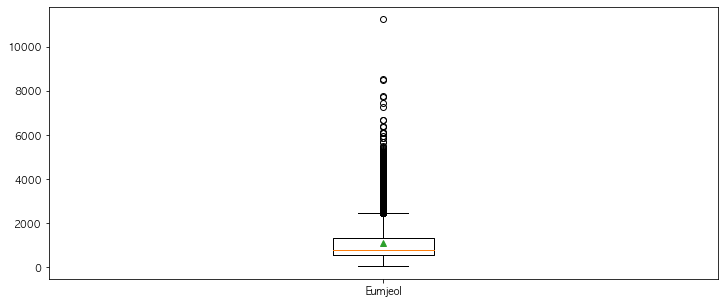

In [29]:
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_eumjeol],
             labels=['Eumjeol'], 
             showmeans=True)

# 워드 클라우드

In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 800, height = 600).generate(' '.join(train_df['review']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

# 긍정 부정 분포

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_df['sentiment'])